<a href="https://colab.research.google.com/github/nirmalaraj77/Python/blob/main/Exploratory_Data_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Import libraries and datasets

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

books = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_books.csv')
unemployment = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_unemployment.csv')
salaries = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_salaries.csv')
divorce = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_divorce.csv')
planes = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_planes.csv')



# **Initial Exploration and Datatypes**
* .head
* .info
* .describe
* .value_counts
* .sns.histplot
* .sns.boxplot
* .dtypes
* .astype(data_type)
* .isin
* select_dtypes

In [2]:
# Count the values associated with each continent in unemployment
print(unemployment["continent"].value_counts())

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


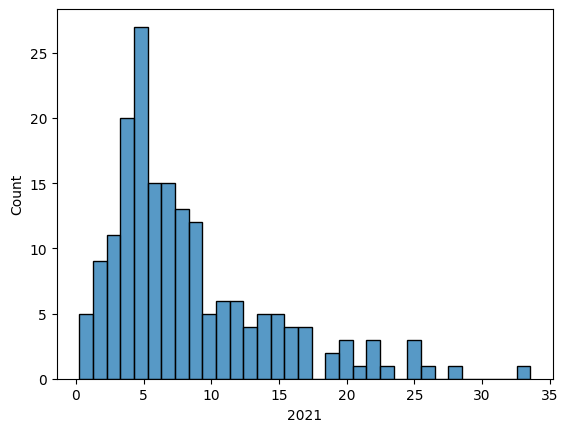

In [3]:
# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=unemployment, x='2021', binwidth=1)
plt.show()

In [4]:
# find datatype
print(books.dtypes)

# change datatype for year from float to whole number
books['year'] = books['year'].astype(int)
print(books.dtypes)

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object
name       object
author     object
rating    float64
year        int64
genre      object
dtype: object


In [5]:
# Validate categorical data
books[books['genre'].isin(['Fiction', 'Non Fiction'])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


   rating  year
0     4.7  2016
1     4.6  2011
2     4.7  2018
3     4.7  2017
4     4.8  2019
2009
2019


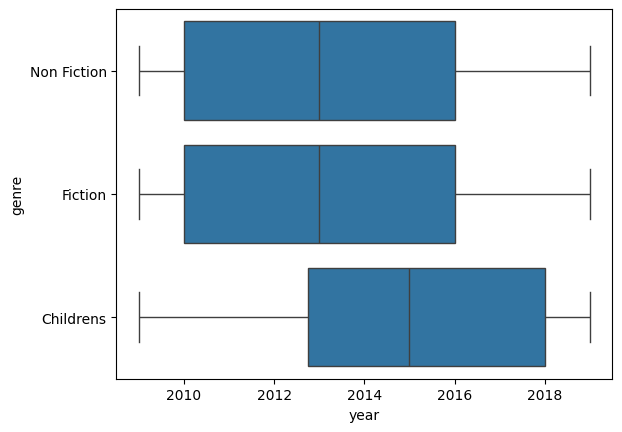

In [6]:
# Validate numerical data - display all columns with number formats

print(books.select_dtypes('number').head())
print(books['year'].min())
print(books['year'].max())
sns.boxplot(data=books, x='year', y='genre')
plt.show()


In [7]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment["continent"].isin(["Oceania"])

# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])

    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

# **Data Summarization**

* .groupby
* .agg
* create dictionary (keys - columns and values - list of agg functions)
* create named tuples for named summary columns
* visualize with sns.barplot
* x / y = df.index to use index as x or y in a df
* sns.barplot() will automatically calculate the average of y with CI 95%

In [5]:
# Group by a category
print(books.groupby('genre').min())

                                                          name  \
genre                                                            
Childrens    5,000 Awesome Facts (About Everything!) (Natio...   
Fiction                                      11/22/63: A Novel   
Non Fiction                      10-Day Green Smoothie Cleanse   

                       author  rating  year  
genre                                        
Childrens         Amy Shields     4.4  2009  
Fiction      Abraham Verghese     3.3  2009  
Non Fiction    Adam Gasiewski     4.0  2009  


In [10]:
# Use aggregation
print(books.agg(['min', 'max']))

                                             name            author  rating  \
min                 10-Day Green Smoothie Cleanse  Abraham Verghese     3.3   
max  Wrecking Ball (Diary of a Wimpy Kid Book 14)      Zhi Gang Sha     4.9   

     year        genre  
min  2009    Childrens  
max  2019  Non Fiction  


In [13]:
# Use dictionary to specify which agg functions to apply to which columns
# keys - columns to apply the aggregation
# value - list of specific agg function to apply to tyhat column

books.agg({'rating': ['mean', 'std'], 'year': ['min', 'max']})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [15]:
# Use named summary columns to specify which agg functions to apply to which columns
# named tuple - column name and agg function
books.agg(mean_rating = ('rating', 'mean'),
          std_rating = ('rating', 'std'),
          median_year = ('year', 'median')
)

,rating,year
mean_rating,4.608571,NaN
std_rating,0.226941,NaN
median_year,NaN,2013.0


In [19]:
# Chain groupby and agg - use dictionary to specify which agg functions to apply to which columns
books.groupby('genre').agg({'year': ['min', 'max']})

year      
              min   max
genre                  
Childrens    2009  2019
Fiction      2009  2019
Non Fiction  2009  2019

In [20]:
# Chain groupby and agg - use named summary columns to specify which agg functions to apply to which columns
books.groupby('genre').agg(
    mean_rating=('rating', 'mean'),
    std_rating=('rating', 'std'),
    median_year=('year', 'median')
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


<ipython-input-30-00e270f1e81a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=books, x='genre', y='rating', palette='deep')


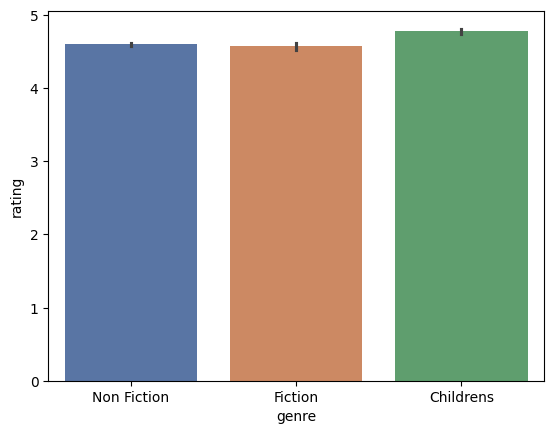

In [30]:
# Visualize barplot grouped by genre
sns.barplot(data=books, x='genre', y='rating', palette='deep')
plt.show()

In [36]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021', 'mean'),
    # Create the std_rate_2021 column
    std_rate_2021 = ('2021', 'std')
)
print(continent_summary)


               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


<ipython-input-39-b0404aa6ca51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unemployment,x='continent', y = '2021', palette='deep')


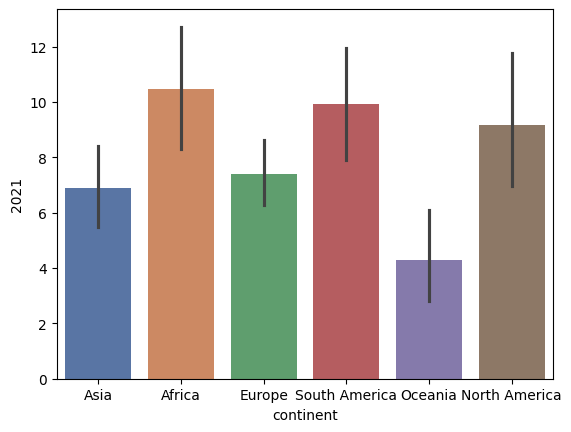

In [39]:
# Create a bar plot of continents and their average unemployment
# sns.barplot calculates mean automatically
sns.barplot(data=unemployment,x='continent', y = '2021', palette='deep')
plt.show()

# **Missing Data**